In [2]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


fix ldm
use rf to find sigma of ldm

In [17]:
def obindingE(z,n):  #Oringinal Binding Energy Function
    a=z+n
    p1=  15.76   *(a)
    p2=  -17.81  *(a**(2./3.))
    p3=  -0.711  * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(z%2 ==0 and n%2==0):
        #print("even-even")
        p5=34.*(a**(-3./4.))
        
    elif(z%2 ==1 and n%2==1): 
        p5=-34.*(a**(-3./4.))
        #print("odd-odd")
    else: 
        p5=0
        #print("even-odd")
        
    be=p1+p2+p3+p4+p5
    return be


In [18]:
def nbindingE(Z,N):  #New Binding Energy Function
    A=Z+N
    a_v  =15.422
    a_s  =16.831
    a_c  =0.686
    a_a  =26.002
    a_as =-18.711
    a_p  = 11.199
    
    if((Z%2 ==0) and (N%2==0)):
        #print("even-even")
        n=1

    elif((Z%2 !=0) and (N%2!=0)):
        n=-1
        #print("odd-odd")
    else:
        n=0
        #print("even-odd")
    
    p_1 = a_v * A
    
    p_2 = a_s * (A**(2/3))

    p_3 = a_c * ( (Z**2)/(A**(1/3)) )
    
    p_4 = a_a + a_s/(A**(1/3))
    
    p_5 = ((A-(2*Z))**2)/A
    
    p_6 = a_p*n/(A**(1/2))
    
    
    
    B= p_1 -p_2 -p_3 -p_4 * p_5 -p_6
    
    return B
    
    

In [10]:

e_00=-342.033529
e_01=-350.396355
e_02=-361.877055
e_03=-369.809918
e_04=-380.941109
e_05=-388.355934
     
e_10=-343.116225
e_11=-354.666293
e_12=-366.804582
e_13=-376.503783
e_14=-387.831002
e_15=-396.591659

print('nbindingE')
print("20,20: ", nbindingE(20,20))
print("20,21: ", nbindingE(20,21))
print("20,22: ", nbindingE(20,22))
print("20,23: ", nbindingE(20,23))
print("20,24: ", nbindingE(20,24))
print("20,25: ", nbindingE(20,25))

print("21,20: ", nbindingE(21,20))
print("21,21: ", nbindingE(21,21))
print("21,22: ", nbindingE(21,22))
print("21,23: ", nbindingE(21,23))
print("21,24: ", nbindingE(21,24))
print("21,25: ", nbindingE(21,25), '\n')

print('obindingE')
print("20,20: ", obindingE(20,20))
print("20,21: ", obindingE(20,21))
print("20,22: ", obindingE(20,22))
print("20,23: ", obindingE(20,23))
print("20,24: ", obindingE(20,24))
print("20,25: ", obindingE(20,25))
print("21,20: ", obindingE(21,20))
print("21,21: ", obindingE(21,21))
print("21,22: ", obindingE(21,22))
print("21,23: ", obindingE(21,23))
print("21,24: ", obindingE(21,24))
print("21,25: ", obindingE(21,25), "\n")

print('nbindingE-exp')
print("20,20: ", nbindingE(20,20)+e_00)
print("20,21: ", nbindingE(20,21)+e_01)
print("20,22: ", nbindingE(20,22)+e_02)
print("20,23: ", nbindingE(20,23)+e_03)
print("20,24: ", nbindingE(20,24)+e_04)
print("20,25: ", nbindingE(20,25)+e_05)

print("21,20: ", nbindingE(21,20)+e_10)
print("21,21: ", nbindingE(21,21)+e_11)
print("21,22: ", nbindingE(21,22)+e_12)
print("21,23: ", nbindingE(21,23)+e_13)
print("21,24: ", nbindingE(21,24)+e_14)
print("21,25: ", nbindingE(21,25)+e_15, '\n')


print('obindingE-experimental')
print("20,20: ", obindingE(20,20)+e_00)
print("20,21: ", obindingE(20,21)+e_01)
print("20,22: ", obindingE(20,22)+e_02)
print("20,23: ", obindingE(20,23)+e_03)
print("20,24: ", obindingE(20,24)+e_04)
print("20,25: ", obindingE(20,25)+e_05)

print("21,20: ", obindingE(21,20)+e_10)
print("21,21: ", obindingE(21,21)+e_11)
print("21,22: ", obindingE(21,22)+e_12)
print("21,23: ", obindingE(21,23)+e_13)
print("21,24: ", obindingE(21,24)+e_14)
print("21,25: ", obindingE(21,25)+e_15, '\n')


nbindingE
20,20:  338.01766568018473
20,21:  351.84740931386847
20,22:  360.75276970610275
20,23:  371.793941288666
20,24:  378.1939288214757
20,25:  386.83238748134687
21,20:  343.6907306479738
21,21:  359.0549596711497
21,22:  369.4971203888809
21,23:  381.99532193747837
21,24:  389.85254764092196
21,25:  399.8722809129108 

obindingE
20,20:  341.0715486854025
20,21:  351.34000024164874
20,22:  364.71196336191315
20,23:  372.9444455458018
20,24:  384.28020421422974
20,25:  390.75176901625423
21,20:  342.88606652233227
21,21:  354.4613394178424
21,22:  369.0333412525571
21,23:  378.5067942099701
21,24:  390.9835115852949
21,25:  398.63242683445867 

nbindingE-exp
20,20:  -4.015863319815253
20,21:  1.4510543138684397
20,22:  -1.1242852938972305
20,23:  1.9840232886660374
20,24:  -2.7471801785242747
20,25:  -1.52354651865312
21,20:  0.5745056479738082
21,21:  4.388666671149679
21,22:  2.692538388880905
21,23:  5.491538937478367
21,24:  2.0215456409219428
21,25:  3.280621912910817 

obin

In [11]:

def pair(Z, N):
    zParity = Z % 2
    nParity = N % 2
    if any(zParity) == 0 and any(nParity) == 0:
        return 1
    elif any(zParity) != 0 and any(nParity) != 0:
        return -1
    else:
        return 0

def bindea_alt(Z, N):
    A=Z+N
    
    volume = 15.75 * A
    surface = -17.8 * A ** (2 / 3)
    coulomb = -0.711 * Z ** 2 / A ** (1 / 3)
    asymmetric = -23.7 * (A - 2 * Z) ** 2 / A
    pairing = 11.18 * pair(Z, N) / A ** 0.5
    return volume + surface + coulomb + asymmetric + pairing


# Between 40^Ca and 120^U, data set: 2611

1.0 1.0 11.500863176006293
1.0 2.0 -1.7768578628563052
1.0 3.0 -12.160980897065471
1.0 4.0 -37.02600910421343
1.0 5.0 -52.88683528165113
1.0 6.0 -78.28202636773227
2.0 1.0 -3.2037953654699116
2.0 2.0 11.948425937983014
2.0 3.0 19.122190811333603
2.0 4.0 7.365570970883558
2.0 5.0 0.18622735528314394
2.0 6.0 -18.114444421254046
2.0 7.0 -30.048854158510153
2.0 8.0 -50.44899778317579
3.0 1.0 -15.618204257977002
3.0 2.0 17.116314642919576
3.0 3.0 38.13155193964678
3.0 4.0 38.16521235825298
3.0 5.0 39.71569442125409
3.0 6.0 28.91284199149407
3.0 7.0 22.670323081847492
3.0 8.0 7.322926816616956
3.0 9.0 -2.680116077138443
3.0 10.0 -20.182478472803737
4.0 1.0 -43.04363760945551
4.0 2.0 2.8353267854001327
4.0 3.0 35.65492864117722
4.0 4.0 46.60455557874595
4.0 5.0 56.909615258649865
4.0 6.0 53.93567241972591
4.0 7.0 53.99277254545844
4.0 8.0 44.34603223068895
4.0 9.0 38.99385357937367
4.0 10.0 25.77356730541453
4.0 11.0 17.276230282999677
4.0 12.0 2.000685985015497
5.0 1.0 -61.947323652617996
5.

43.0 62.0 874.1822009517929
43.0 63.0 879.2875990844063
43.0 64.0 881.8543391033469
43.0 65.0 886.2338829928913
43.0 66.0 888.1158232458613
43.0 67.0 891.8106421322886
43.0 68.0 893.0468296548321
43.0 69.0 896.0950550876539
43.0 70.0 896.721700682566
43.0 71.0 899.1587330694019
43.0 72.0 899.2094619787706
43.0 73.0 901.0682092812714
43.0 74.0 900.5742858482724
43.0 75.0 901.8853777559484
43.0 76.0 900.8759071635689
43.0 77.0 901.6678876291742
43.0 78.0 900.1699973919654
44.0 41.0 680.2751266113364
44.0 42.0 694.8895491065473
44.0 43.0 711.1834751004022
44.0 44.0 724.3663847854535
44.0 45.0 739.252299514825
44.0 46.0 751.1031015295027
44.0 47.0 764.6767822093119
44.0 48.0 775.2860554937754
44.0 49.0 787.6348956567215
44.0 50.0 797.0853447353169
44.0 51.0 808.2892472835314
44.0 52.0 816.6565339107336
44.0 53.0 826.7886927107955
44.0 54.0 834.1421646686523
44.0 55.0 843.2697505586247
44.0 56.0 849.6730821128939
44.0 57.0 857.8578466627409
44.0 58.0 863.3696028959328
44.0 59.0 870.66841117

68.0 74.0 1115.4527840638032
68.0 75.0 1128.4842472491732
68.0 76.0 1139.2662204971132
68.0 77.0 1151.5463264675473
68.0 78.0 1161.605826847901
68.0 79.0 1173.166108536632
68.0 80.0 1182.5335306538936
68.0 81.0 1193.4038007162342
68.0 82.0 1202.1078865384127
68.0 83.0 1212.3163525799732
68.0 84.0 1220.3843015891682
68.0 85.0 1229.957672276545
68.0 86.0 1237.4152429520673
68.0 87.0 1246.378825835414
68.0 88.0 1253.250429253368
68.0 89.0 1261.6282210452493
68.0 90.0 1267.937007298587
68.0 91.0 1275.751777278146
68.0 92.0 1281.5197153503516
68.0 93.0 1288.7930824949394
68.0 94.0 1294.0410341575741
68.0 95.0 1300.7935385445226
68.0 96.0 1305.5413267928536
68.0 97.0 1311.7924957611326
68.0 98.0 1316.0589682521863
68.0 99.0 1321.8273777664726
68.0 100.0 1325.6304656793423
68.0 101.0 1330.93379729688
68.0 102.0 1334.2905699953353
68.0 103.0 1339.1456637982676
68.0 104.0 1342.0723796401287
68.0 105.0 1346.4952834622381
68.0 106.0 1349.007437068092
68.0 107.0 1353.0134523146135
68.0 108.0 1355.

No handles with labels found to put in legend.


95.0 144.0 1751.5600757036063
95.0 145.0 1756.682315979524
95.0 146.0 1760.2062313911906
95.0 147.0 1765.0223541854102
95.0 148.0 1768.2500184908504
95.0 149.0 1772.767755073411
95.0 150.0 1775.7066972565501
95.0 151.0 1779.933523750746
95.0 152.0 1782.5910244035065
95.0 153.0 1786.5341721828813
95.0 154.0 1788.917273604829
96.0 135.0 1709.1833424648694
96.0 136.0 1714.580083834893
96.0 137.0 1721.2740781689704
96.0 138.0 1726.32976733404
96.0 139.0 1732.680961034242
96.0 140.0 1737.4045776792757
96.0 141.0 1743.4218749473312
96.0 142.0 1747.8220915133784
96.0 143.0 1753.5140941924822
96.0 144.0 1757.5992888334467
96.0 145.0 1762.9743090848303
96.0 146.0 1766.7525779757786
96.0 147.0 1771.8186503241063
96.0 148.0 1775.2978193586503
96.0 149.0 1780.0627121425662
96.0 150.0 1783.250348054344
96.0 151.0 1787.721574316106
96.0 152.0 1790.6249952571204
96.0 153.0 1794.8098231030888
96.0 154.0 1797.4361087095479
96.0 155.0 1801.3415711712285
96.0 156.0 1803.6975721455692
97.0 136.0 1719.4917

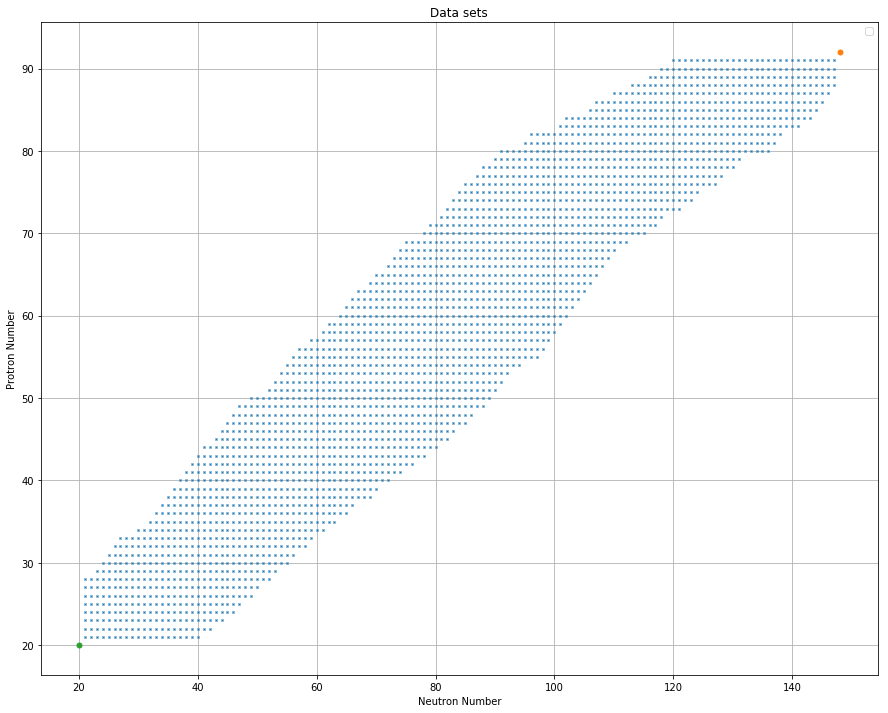

In [12]:
y_the=[]
N_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3)#, skip_header=350, skip_footer=3433-2953) #Number of neutrons
Z_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4)#, skip_header=350, skip_footer=3433-2953) #Number of protons
X_exp = np.transpose(np.stack((Z_exp,N_exp)))
A_exp = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5)#, skip_header=350, skip_footer=3433-2953)


for X_exp_i in X_exp:
    y_the.append(nbindingE(X_exp_i[0], X_exp_i[1]))
    print(X_exp_i[0], X_exp_i[1], nbindingE(X_exp_i[0], X_exp_i[1]))

the_exp_diff=y_the-y_exp

ZN_exp=np.transpose(np.stack((Z_exp, N_exp, the_exp_diff, y_exp, y_the)))
Z_aug=[]
N_aug=[]

the_exp_diff_aug=[]

y_exp_aug=[]
y_the_aug=[]

for ZN_i in ZN_exp:
    if (ZN_i[0]>20) and (ZN_i[0]<92):
        if (ZN_i[1]>20) and (ZN_i[1]<240-92):
            #if (ZN_i[0]+ZN_i[1]>40) and (ZN_i[0]+ZN_i[1]<240):
            Z_aug.append(ZN_i[0])
            N_aug.append(ZN_i[1])
            the_exp_diff_aug.append(ZN_i[2])
            y_exp_aug.append(ZN_i[3])
            y_the_aug.append(ZN_i[4])
        

print(len(y_the), len(Z_exp))
print("data sets:", len(y_the_aug), len(y_exp_aug))
plt.title('Data sets')
plt.plot(N_aug, Z_aug,  'x', markersize=2, label="_aug")
#plt.plot(N_exp, Z_exp,  'x', markersize=2, label="_exp")
plt.plot(240-92, 92,  'o',   markersize=5, label="_aug")
plt.plot(40-20, 20,  'o',   markersize=5, label="_aug")

plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.legend()
plt.grid(True)
plt.show()




In [13]:
def ki(exp_the):
    ki_2=0
    
    #print(exp_the[0], "\n\n")
    
    
    for exp_the_i in exp_the:
        ki_2=ki_2+(exp_the_i[0]-exp_the_i[1])**2
        #print(exp_the_i[0],exp_the_i[1])
    
    #print(len(exp_the)) 
    return np.sqrt(ki_2/(len(exp_the)))

In [14]:
from sklearn.metrics import mean_squared_error
y_exp_the_aug=np.transpose(np.stack((y_exp_aug, y_the_aug)))
y_train, y_test = train_test_split( y_exp_the_aug, test_size =0.25, random_state=42 )



print("all augmented:             ", ki(y_exp_the_aug))
y_exp_the_aug=np.transpose(y_exp_the_aug)
y_exp_the=np.transpose(np.stack((y_exp,y_the)))
print("Mean Squared Error of all: ", np.sqrt(mean_squared_error(y_exp_the_aug[0],y_exp_the_aug[1])), "\n")



print("trained:                       ", ki(y_train))
y_train=np.transpose(y_train)
print("Mean Squared Error of trained: ", np.sqrt(mean_squared_error(y_train[0],y_train[1])), "\n")



print("test:                         ", ki(y_test))
y_test=np.transpose(y_test)
print("Mean Squared Error of tested: ", np.sqrt(mean_squared_error(y_test[0],y_test[1])), "\n")

all augmented:              37.2729340464314
Mean Squared Error of all:  37.27293404643142 

trained:                        37.61612368216364
Mean Squared Error of trained:  37.61612368216364 

test:                          36.2244051114222
Mean Squared Error of tested:  36.22440511142217 



# Region Z>20, Z<50, data set: 1978

No handles with labels found to put in legend.


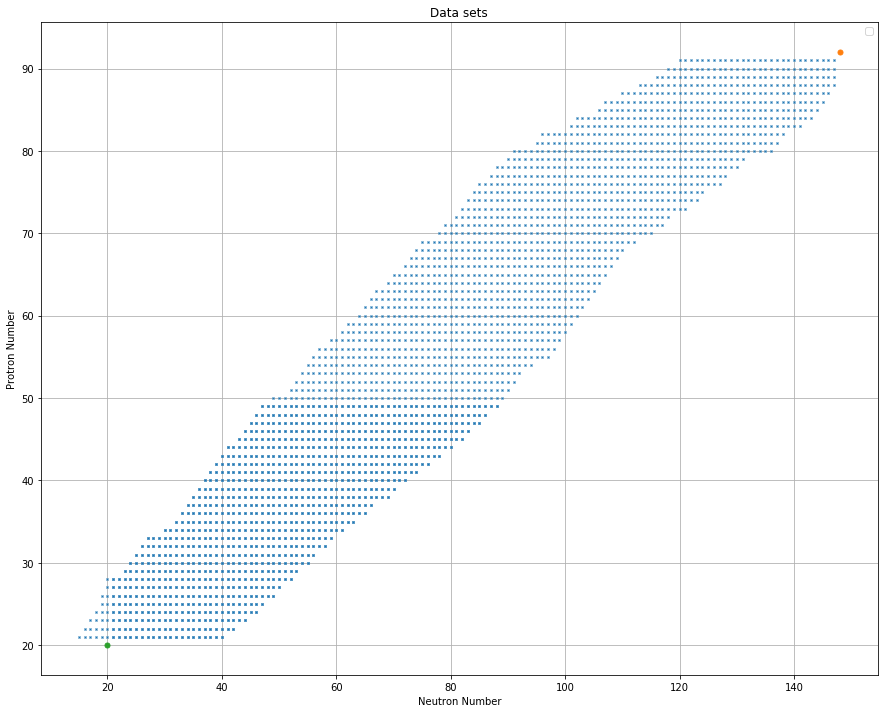

In [15]:

for ZN_i in ZN_exp:
    if (ZN_i[0]>20) and (ZN_i[0]<50):
        #if (ZN_i[1]>=20) and (ZN_i[1]<=240-92):
            #if (ZN_i[0]+ZN_i[1]>40) and (ZN_i[0]+ZN_i[1]<240):
            Z_aug.append(ZN_i[0])
            N_aug.append(ZN_i[1])
            the_exp_diff_aug.append(ZN_i[2])
            y_exp_aug.append(ZN_i[3])
            y_the_aug.append(ZN_i[4])
        

        
plt.title('Data sets')
plt.plot(N_aug, Z_aug,  'x', markersize=2, label="_aug")
#plt.plot(N_exp, Z_exp,  'x', markersize=2, label="_exp")
plt.plot(240-92, 92,  'o',   markersize=5, label="_aug")
plt.plot(40-20, 20,  'o',   markersize=5, label="_aug")

plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.legend()
plt.grid(True)
plt.show()


In [16]:

y_exp_the=np.transpose(np.stack((y_exp,y_the)))

print("All: ", ki(y_exp_the),"\n")



y_exp_the_aug=np.transpose(np.stack((y_exp_aug, y_the_aug)))


y_train, y_test = train_test_split( y_exp_the_aug, test_size =0.25, random_state=42 )


print("All augmented:             ", ki(y_exp_the_aug))
y_exp_the_aug=np.transpose(y_exp_the_aug)
print("Mean Squared Error of all: ", np.sqrt(mean_squared_error(y_exp_the_aug[0],y_exp_the_aug[1])), "\n")


print("trained:                       ", ki(y_train))
y_train=np.transpose(y_train)
print("Mean Squared Error of trained: ", np.sqrt(mean_squared_error(y_train[0],y_train[1])), "\n")

print("test:                         ", ki(y_test))
y_test=np.transpose(y_test)
print("Mean Squared Error of tested: ", np.sqrt(mean_squared_error(y_test[0],y_test[1])), "\n")


All:  38.8695608165748 

All augmented:              35.46422087682689
Mean Squared Error of all:  35.4642208768269 

trained:                        35.41992760265268
Mean Squared Error of trained:  35.41992760265268 

test:                          35.59677001456715
Mean Squared Error of tested:  35.59677001456716 



No handles with labels found to put in legend.


[20. 20. 21. ... 91. 92. 92.]
[ 14.  15.  15. ... 150. 150. 151.]
(2695,)
(2695,)
(2695,)
(3433,)
(3433,)


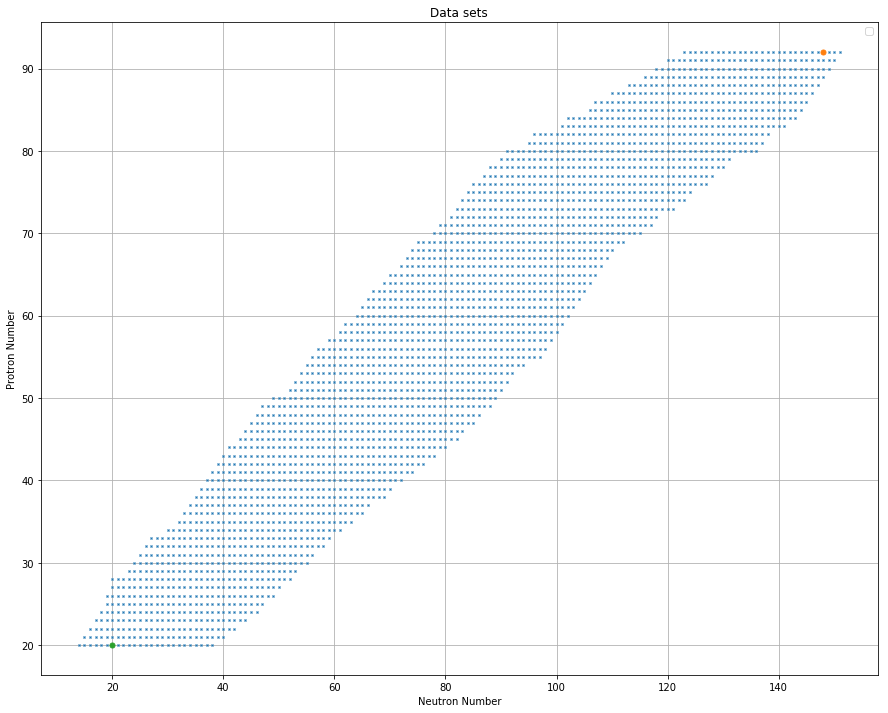

In [42]:
fort_theBE= np.genfromtxt('theBindingEnergy.dat',usecols=2)#, skip_header=350, skip_footer=3433-2953) #Number of protons
fort_thez =  np.genfromtxt('theBindingEnergy.dat',usecols=0)
fort_then =  np.genfromtxt('theBindingEnergy.dat',usecols=1)

print(fort_thez)
print(fort_then)
print(np.shape(fort_thez))
print(np.shape(fort_then))
print(np.shape(fort_theBE))

print(np.shape(Z_exp))
print(np.shape(N_exp))


plt.title('Data sets')
plt.plot(fort_then, fort_thez,  'x', markersize=2, label="_aug")
plt.plot(240-92, 92,  'o',   markersize=5, label="_aug")
plt.plot(40-20, 20,  'o',   markersize=5, label="_aug")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.legend()
plt.grid(True)
plt.show()

#ZN_exp=np.transpose(np.stack((Z_exp, N_exp, the_exp_diff, y_exp, y_the)))


X_fort=np.transpose(np.stack((fort_thez, fort_then, fort_theBE)))

for ZN_exp_i in ZN_exp:
    for X_fort_i in X_fort:
        if X_fort_i[0]==ZN_exp_i[0] and X_fort_i[1]==ZN_exp_i[1]:
            
            fort_theBE_aug.appendX_fort[2]
            Exp_val.append(ZN_exp[])
        

